In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression # Cv is nothing but Cross validation 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df.head()
# it gives u the by default the first five rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [60]:
df.tail()
# it gives u the by default the last five rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [61]:
df.info()
# this is one way to find the data-type and the count of every features what we get from this is basically a count and the datatype
# with respect to count we can understand whether there are null values present are not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


The count of the data is same in every features 
- There are total 8 features as u can see
- There are 7 float data type and one is object that is Date


In [62]:
df.describe()
# by using describe u can get the statistical methods that has been used below instead of calculating manually
# The describe can be used in both object and numeric data so u can use that as well 
# describe is basically to gain insights from statistic analysis

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


### Checking Null values

In [63]:
df.isna().sum()
# this basically tells us whether there are null values present or not

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

As u can see the above table does not contain any null values

Dropping Date column as it is not providing much insights in our analysis

In [64]:
df = df.drop(columns = 'Date') # by using the drop syntax we can drop anything
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...
1230,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


see as u can see the Date column as been dropped so now need to see if there is any outlier present in the dataset by using different different vizualization techniques


## Vizualization Outlier

In [65]:
def visualize_outliers(dataframe):
    """
    This function checks for outliers in each numeric feature of the dataframe
    using the IQR method and visualizes them using box plots.
    
    Parameters:
        dataframe (pd.DataFrame): The input data frame with features to check for outliers.
    """
    
    numeric_features = dataframe.select_dtypes(include=['number']).columns
    
    for feature in numeric_features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Print outliers information
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
        print(f'Outliers in feature "{feature}":')
        print(outliers)
        
        # Visualization
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=dataframe[feature])
        plt.title(f'Box plot of {feature}')
        plt.xlabel(feature)
        plt.show()

Outliers in feature "Open":
       Open    High     Low    Last   Close  Total Trade Quantity  \
1    217.00  218.60  205.90  210.25  209.20             3519515.0   
2    223.50  227.80  216.15  217.25  218.20             1728786.0   
3    230.00  237.50  225.75  226.45  227.60             1708590.0   
4    234.55  234.60  221.05  230.30  230.90             1534749.0   
5    234.05  235.95  230.20  233.50  233.75             3069914.0   
..      ...     ...     ...     ...     ...                   ...   
230  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  225.00  230.25  222.50  226.50  226.80            13953152.0   
259  216.40  216.85  213.10  213.65  213.70             2906933.0   

     Turnover (Lacs)  
1            7407.06  
2            3815.79  
3            3960.27  
4            3486.05  
5            7162.35  
..   

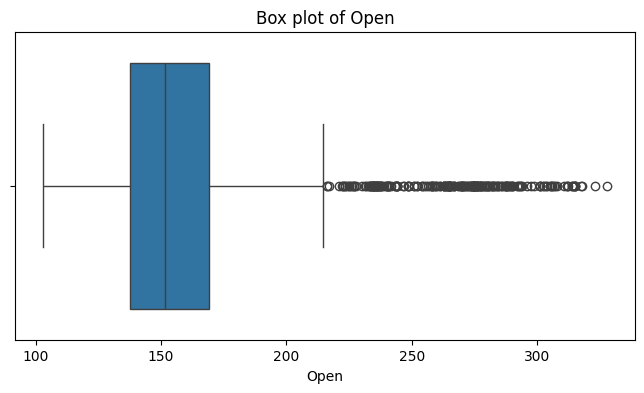

Outliers in feature "High":
       Open    High     Low    Last   Close  Total Trade Quantity  \
2    223.50  227.80  216.15  217.25  218.20             1728786.0   
3    230.00  237.50  225.75  226.45  227.60             1708590.0   
4    234.55  234.60  221.05  230.30  230.90             1534749.0   
5    234.05  235.95  230.20  233.50  233.75             3069914.0   
6    234.55  236.80  231.10  233.80  233.25             5082859.0   
..      ...     ...     ...     ...     ...                   ...   
229  227.00  227.90  224.35  225.50  225.30             1920643.0   
230  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  225.00  230.25  222.50  226.50  226.80            13953152.0   

     Turnover (Lacs)  
2            3815.79  
3            3960.27  
4            3486.05  
5            7162.35  
6           11859.95  
..   

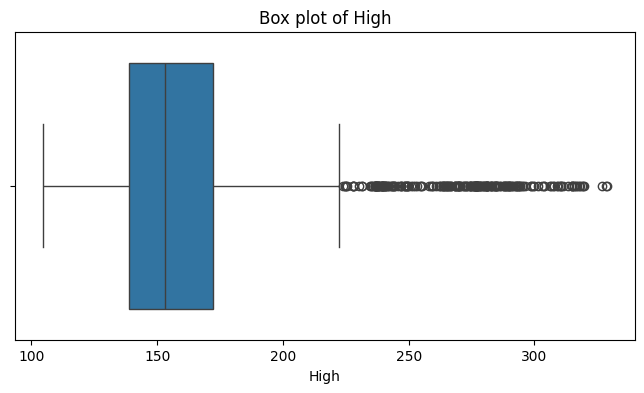

Outliers in feature "Low":
       Open    High     Low    Last   Close  Total Trade Quantity  \
2    223.50  227.80  216.15  217.25  218.20             1728786.0   
3    230.00  237.50  225.75  226.45  227.60             1708590.0   
4    234.55  234.60  221.05  230.30  230.90             1534749.0   
5    234.05  235.95  230.20  233.50  233.75             3069914.0   
6    234.55  236.80  231.10  233.80  233.25             5082859.0   
..      ...     ...     ...     ...     ...                   ...   
229  227.00  227.90  224.35  225.50  225.30             1920643.0   
230  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  225.00  230.25  222.50  226.50  226.80            13953152.0   

     Turnover (Lacs)  
2            3815.79  
3            3960.27  
4            3486.05  
5            7162.35  
6           11859.95  
..    

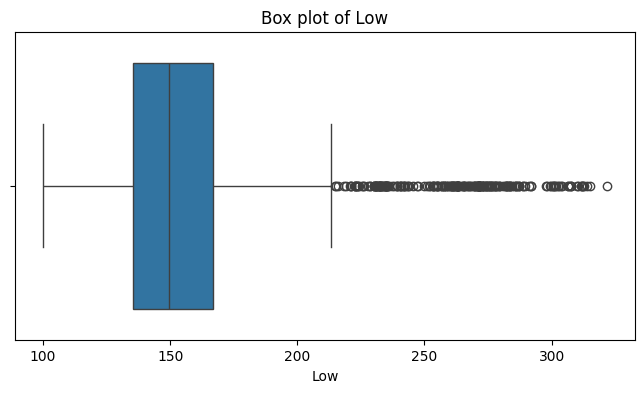

Outliers in feature "Last":
       Open    High     Low    Last   Close  Total Trade Quantity  \
2    223.50  227.80  216.15  217.25  218.20             1728786.0   
3    230.00  237.50  225.75  226.45  227.60             1708590.0   
4    234.55  234.60  221.05  230.30  230.90             1534749.0   
5    234.05  235.95  230.20  233.50  233.75             3069914.0   
6    234.55  236.80  231.10  233.80  233.25             5082859.0   
..      ...     ...     ...     ...     ...                   ...   
230  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  225.00  230.25  222.50  226.50  226.80            13953152.0   
234  211.30  221.80  209.75  221.70  220.50             8891566.0   

     Turnover (Lacs)  
2            3815.79  
3            3960.27  
4            3486.05  
5            7162.35  
6           11859.95  
..   

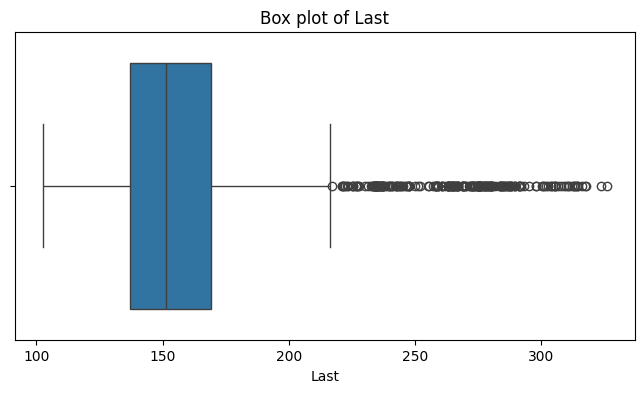

Outliers in feature "Close":
       Open    High     Low    Last   Close  Total Trade Quantity  \
2    223.50  227.80  216.15  217.25  218.20             1728786.0   
3    230.00  237.50  225.75  226.45  227.60             1708590.0   
4    234.55  234.60  221.05  230.30  230.90             1534749.0   
5    234.05  235.95  230.20  233.50  233.75             3069914.0   
6    234.55  236.80  231.10  233.80  233.25             5082859.0   
..      ...     ...     ...     ...     ...                   ...   
230  227.90  231.25  223.40  226.95  226.35             7866167.0   
231  226.95  231.40  226.35  228.00  227.80             3608627.0   
232  226.95  228.25  223.15  227.50  226.95             5175219.0   
233  225.00  230.25  222.50  226.50  226.80            13953152.0   
234  211.30  221.80  209.75  221.70  220.50             8891566.0   

     Turnover (Lacs)  
2            3815.79  
3            3960.27  
4            3486.05  
5            7162.35  
6           11859.95  
..  

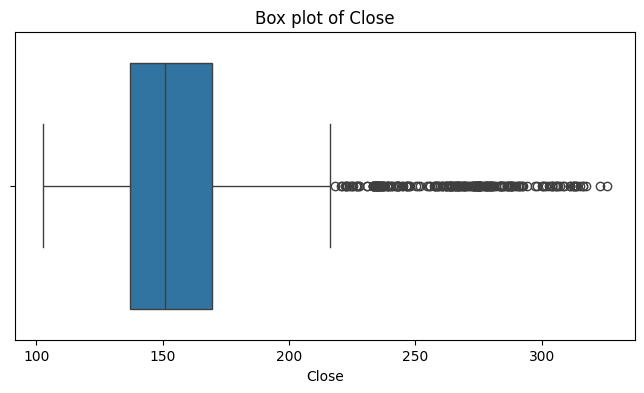

Outliers in feature "Total Trade Quantity":
        Open    High     Low    Last   Close  Total Trade Quantity  \
14    223.45  236.70  223.30  234.00  233.95             6377909.0   
17    222.50  235.15  220.65  221.05  222.00             7514106.0   
43    248.70  254.95  234.35  235.10  235.65            13272609.0   
64    264.50  284.50  262.70  280.10  281.00             6676660.0   
74    274.65  274.65  266.05  267.00  267.05             6224725.0   
...      ...     ...     ...     ...     ...                   ...   
1068  171.65  177.15  166.10  174.25  174.85            11693055.0   
1069  173.85  175.45  170.10  171.30  171.20             8772925.0   
1070  157.00  176.80  155.20  170.75  171.10            17064363.0   
1180  159.00  166.10  158.00  162.10  161.05            10232143.0   
1209  155.00  155.00  141.10  144.90  144.30            11917625.0   

      Turnover (Lacs)  
14           14784.50  
17           17130.29  
43           32325.56  
64           18483.

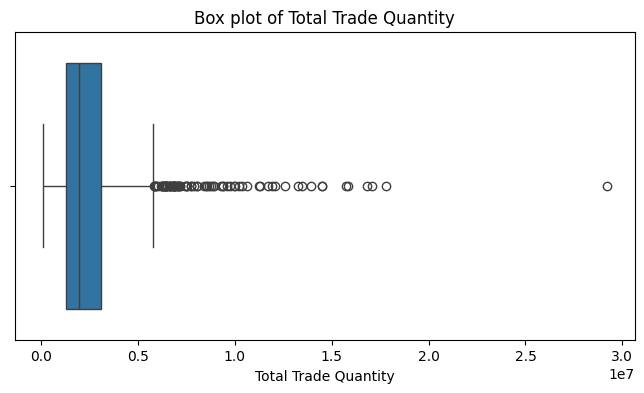

Outliers in feature "Turnover (Lacs)":
        Open    High     Low    Last   Close  Total Trade Quantity  \
10    235.00  237.00  227.95  233.75  234.60             5395319.0   
14    223.45  236.70  223.30  234.00  233.95             6377909.0   
17    222.50  235.15  220.65  221.05  222.00             7514106.0   
22    236.00  243.55  235.05  236.85  236.70             5242852.0   
42    232.50  238.05  230.40  235.00  235.45             5700851.0   
...      ...     ...     ...     ...     ...                   ...   
1068  171.65  177.15  166.10  174.25  174.85            11693055.0   
1069  173.85  175.45  170.10  171.30  171.20             8772925.0   
1070  157.00  176.80  155.20  170.75  171.10            17064363.0   
1180  159.00  166.10  158.00  162.10  161.05            10232143.0   
1209  155.00  155.00  141.10  144.90  144.30            11917625.0   

      Turnover (Lacs)  
10           12589.59  
14           14784.50  
17           17130.29  
22           12538.39  


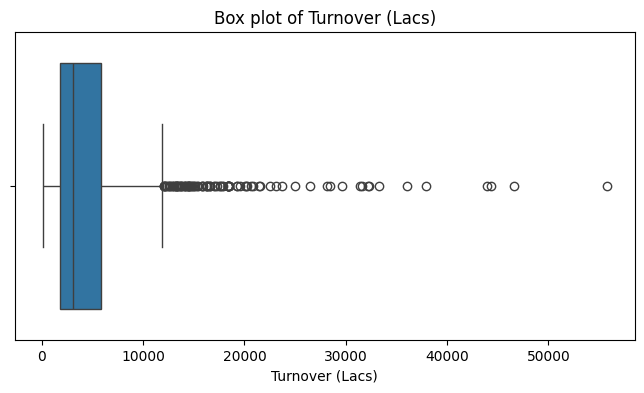

In [66]:
visualize_outliers(df)

In [67]:
def remove_outliers(dataframe):
    """
    This function removes outliers from each numeric feature of the dataframe
    using the IQR method and returns the cleaned dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): The input data frame with features to check for outliers.
    
    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """
    
    cleaned_df = dataframe.copy()  # Create a copy to avoid modifying the original DataFrame
    numeric_features = cleaned_df.select_dtypes(include=['number']).columns
    
    for feature in numeric_features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = cleaned_df[feature].quantile(0.25)
        Q3 = cleaned_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
    
    return cleaned_df

In [68]:
df1 = remove_outliers(df)

In [69]:
df1

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
286,161.85,163.50,153.20,157.30,156.00,2470478.0,3921.42
287,165.50,166.90,160.45,161.00,162.10,1267995.0,2082.83
288,171.80,171.80,165.60,166.25,166.00,2372930.0,3988.91
289,167.00,171.70,167.00,170.50,170.45,2548868.0,4339.35
290,164.70,167.60,163.85,166.35,166.45,2298689.0,3815.79
...,...,...,...,...,...,...,...
1230,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


As u can see i have removed the outliers that was present in the feature there were almost 1235 rows now there are only 853 rows 
lets vizualize it to see if it has worked or not

Outliers in feature "Open":
Empty DataFrame
Columns: [Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


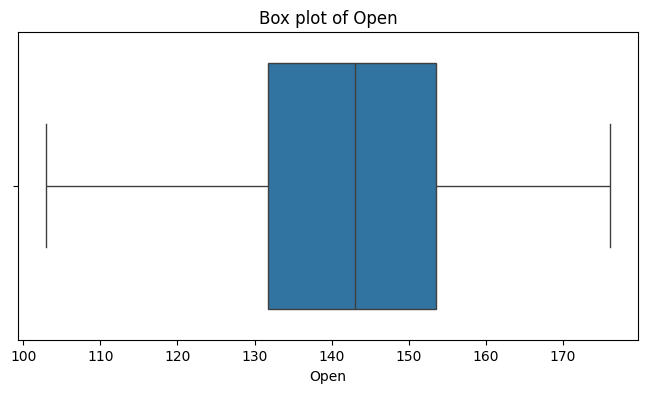

Outliers in feature "High":
Empty DataFrame
Columns: [Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


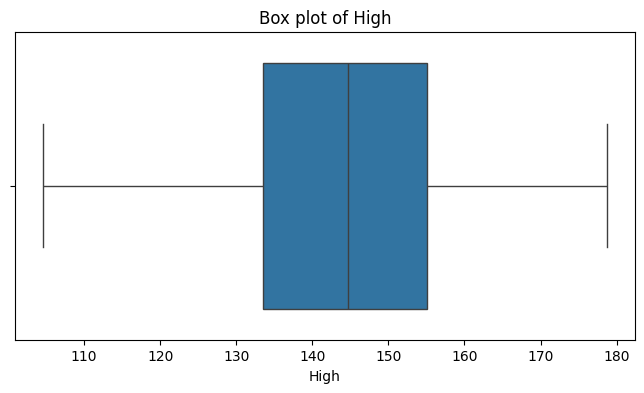

Outliers in feature "Low":
Empty DataFrame
Columns: [Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


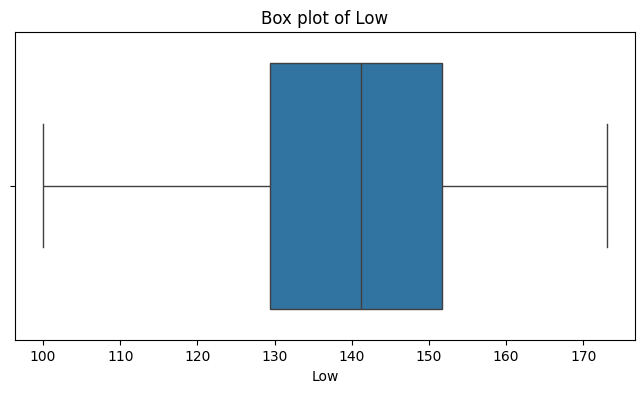

Outliers in feature "Last":
Empty DataFrame
Columns: [Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


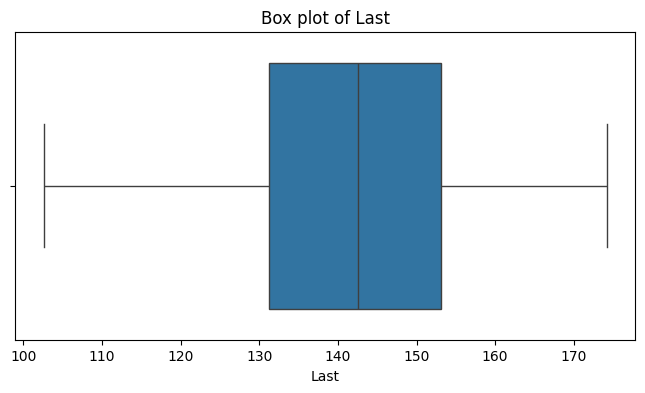

Outliers in feature "Close":
Empty DataFrame
Columns: [Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []


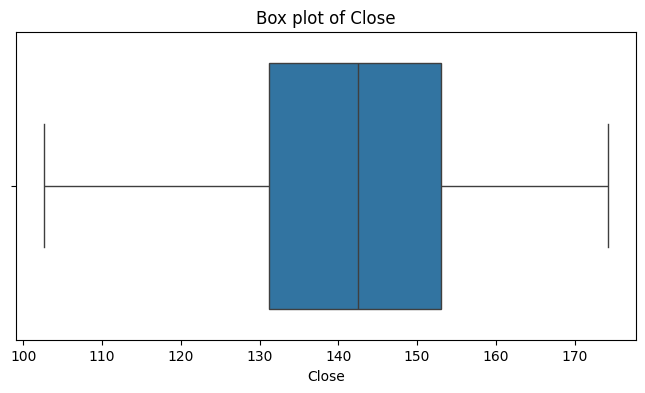

Outliers in feature "Total Trade Quantity":
        Open    High     Low    Last   Close  Total Trade Quantity  \
387   141.60  145.50  141.35  144.45  144.70             3987646.0   
543   138.00  142.25  136.55  140.10  140.15             3754038.0   
550   131.50  131.50  128.80  130.95  130.05             3903542.0   
575   122.00  129.00  122.00  127.90  128.15             4305954.0   
771   128.90  128.90  112.50  115.50  114.85             3763375.0   
783   142.00  147.30  141.00  143.50  143.75             3835649.0   
810   129.75  132.75  129.15  132.00  132.20             4332991.0   
1115  142.85  148.60  142.30  148.20  148.00             3912192.0   
1206  149.00  149.20  144.05  145.00  144.55             3835593.0   

      Turnover (Lacs)  
387           5746.46  
543           5255.56  
550           5074.00  
575           5461.09  
771           4533.74  
783           5520.40  
810           5696.62  
1115          5700.15  
1206          5596.79  


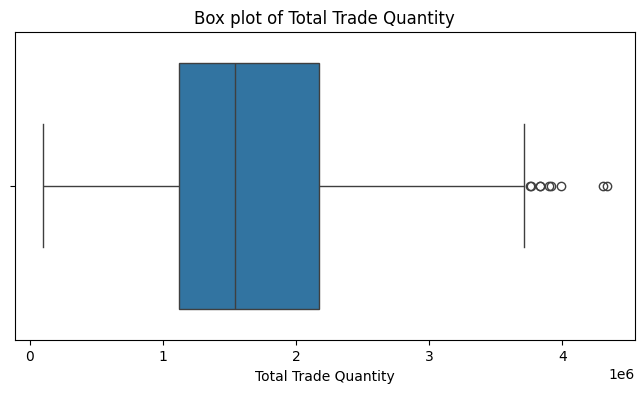

Outliers in feature "Turnover (Lacs)":
        Open    High     Low    Last   Close  Total Trade Quantity  \
303   176.10  178.70  173.05  173.95  173.75             3264325.0   
325   158.45  162.75  157.60  158.75  159.10             3647423.0   
387   141.60  145.50  141.35  144.45  144.70             3987646.0   
962   160.20  163.35  157.25  157.55  157.85             3713745.0   
986   160.65  163.90  158.70  159.85  160.25             3624666.0   
1179  160.80  162.85  156.35  158.30  158.05             3624182.0   

      Turnover (Lacs)  
303           5734.23  
325           5845.75  
387           5746.46  
962           5966.47  
986           5845.16  
1179          5797.01  


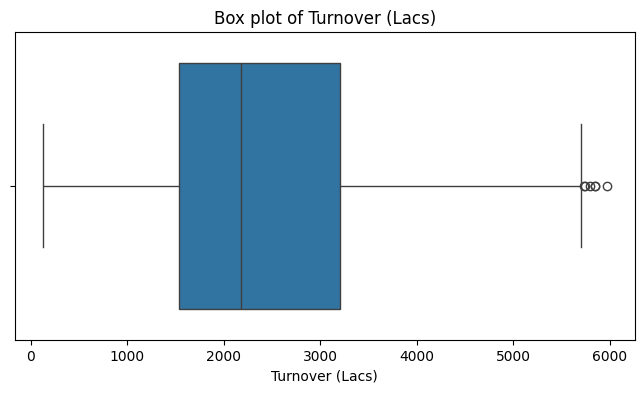

In [70]:
visualize_outliers(df1)

### Outlier Analysis Summary

In our analysis, we initially identified and visualized several outliers present in the dataset. After applying the outlier removal process, we observed a significant reduction in the number of outliers. 

Currently, the remaining outliers are minimal, and their presence warrants careful consideration. It's important to evaluate the context and impact of these outliers on our analysis. 

#### Key Considerations:
- **Contextual Relevance**: Some outliers may represent legitimate variations in the data that could provide valuable insights. 
- **Impact on Analysis**: We should assess how these outliers affect the overall results, such as statistical measures or predictive modeling outcomes.
- **Decision to Retain or Remove**: Ultimately, the decision to keep or exclude these remaining outliers should be guided by our analytical goals and the specific characteristics of the dataset.

In conclusion, while the majority of outliers have been successfully removed, the remaining few require thoughtful consideration to determine their relevance and potential impact on our analysis.


In [71]:
def univariate_analysis(dataframe):
    """
    Perform univariate analysis on numeric features of the dataframe.
    This includes descriptive statistics and multiple visualizations.
    
    Parameters:
        dataframe (pd.DataFrame): The input data frame for analysis.
    """
    
    # Select numeric features
    numeric_features = dataframe.select_dtypes(include=['number']).columns
    
    for feature in numeric_features:
        # Descriptive statistics
        print(f"\nUnivariate Analysis for '{feature}':")
        print(dataframe[feature].describe())
        
        # Visualization
        plt.figure(figsize=(15, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        sns.histplot(dataframe[feature], bins=20, kde=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        # Box Plot
        plt.subplot(2, 2, 2)
        sns.boxplot(x=dataframe[feature])
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
        
        # Violin Plot
        plt.subplot(2, 2, 3)
        sns.violinplot(x=dataframe[feature])
        plt.title(f'Violin Plot of {feature}')
        plt.xlabel(feature)
        
        # Count Plot for discrete numeric features
        if len(dataframe[feature].unique()) < 20:  # Limit for count plot
            plt.subplot(2, 2, 4)
            sns.countplot(x=dataframe[feature])
            plt.title(f'Count Plot of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()


Univariate Analysis for 'Open':
count    853.000000
mean     141.919109
std       14.460510
min      103.000000
25%      131.750000
50%      143.000000
75%      153.600000
max      176.100000
Name: Open, dtype: float64


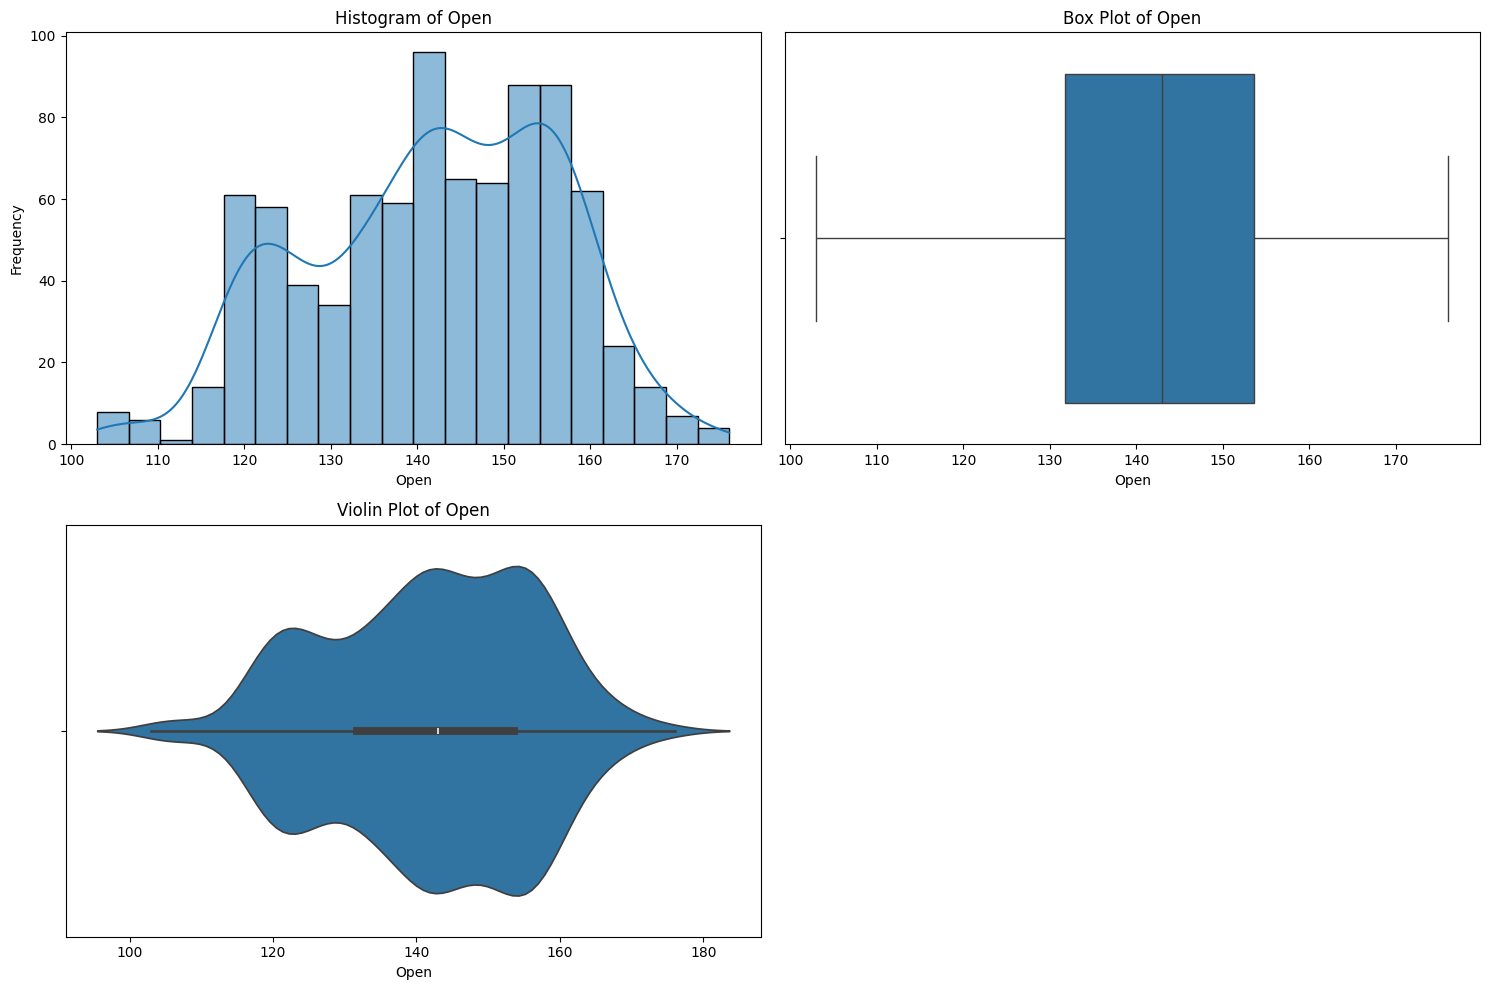


Univariate Analysis for 'High':
count    853.000000
mean     143.621747
std       14.489402
min      104.600000
25%      133.500000
50%      144.700000
75%      155.100000
max      178.700000
Name: High, dtype: float64


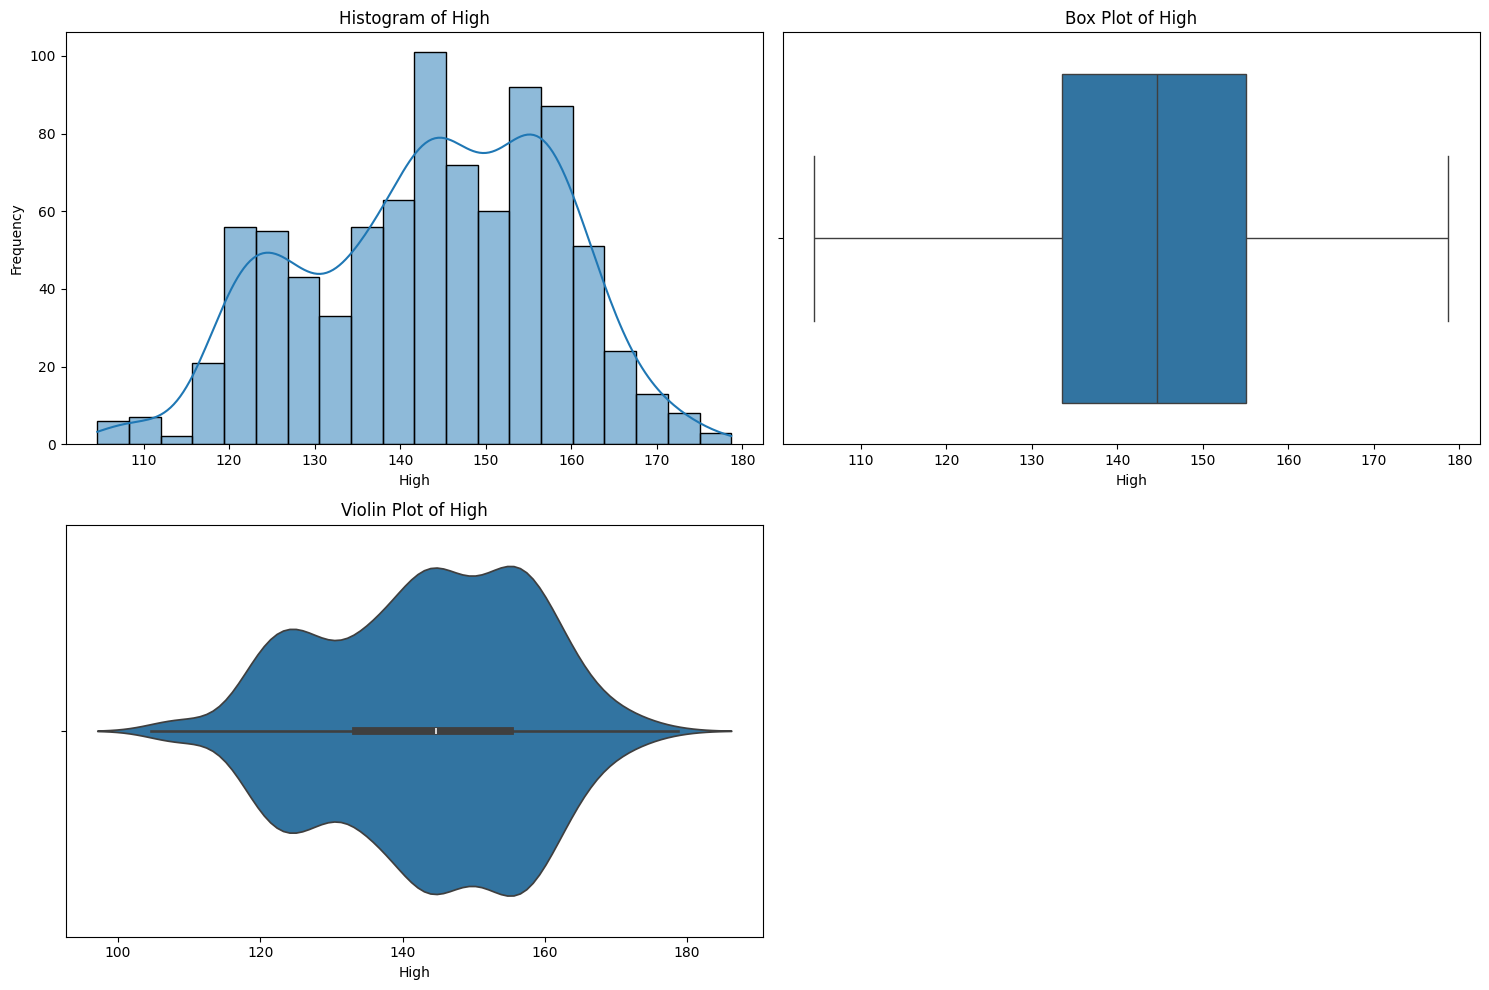


Univariate Analysis for 'Low':
count    853.000000
mean     139.953458
std       14.232723
min      100.000000
25%      129.450000
50%      141.200000
75%      151.700000
max      173.050000
Name: Low, dtype: float64


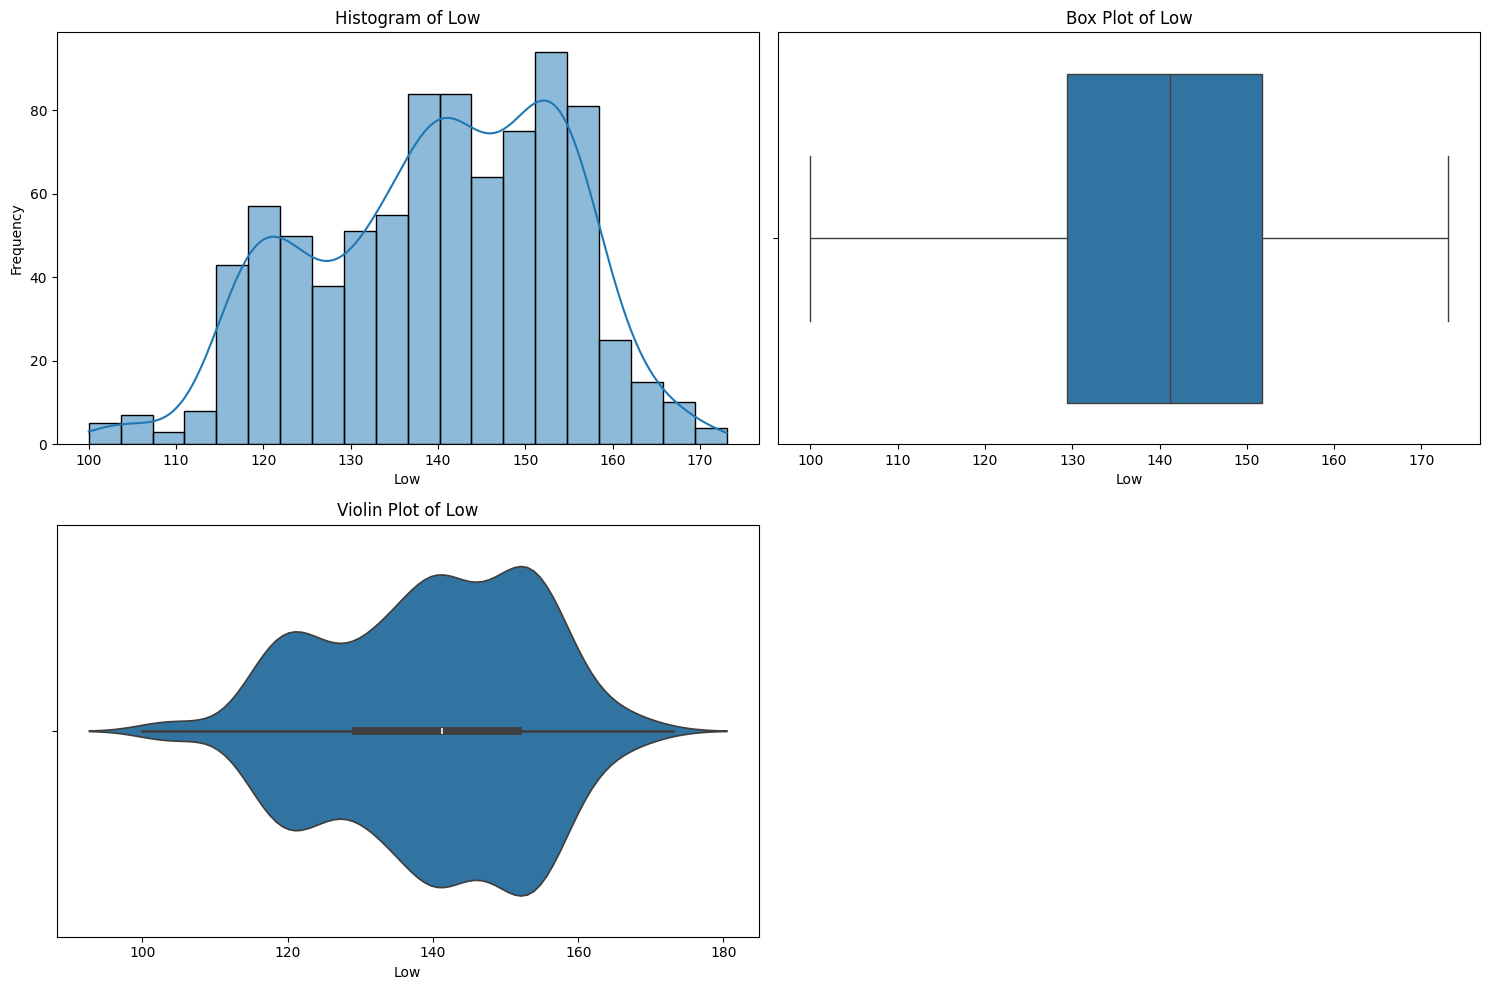


Univariate Analysis for 'Last':
count    853.000000
mean     141.463365
std       14.221730
min      102.600000
25%      131.300000
50%      142.500000
75%      153.050000
max      174.250000
Name: Last, dtype: float64


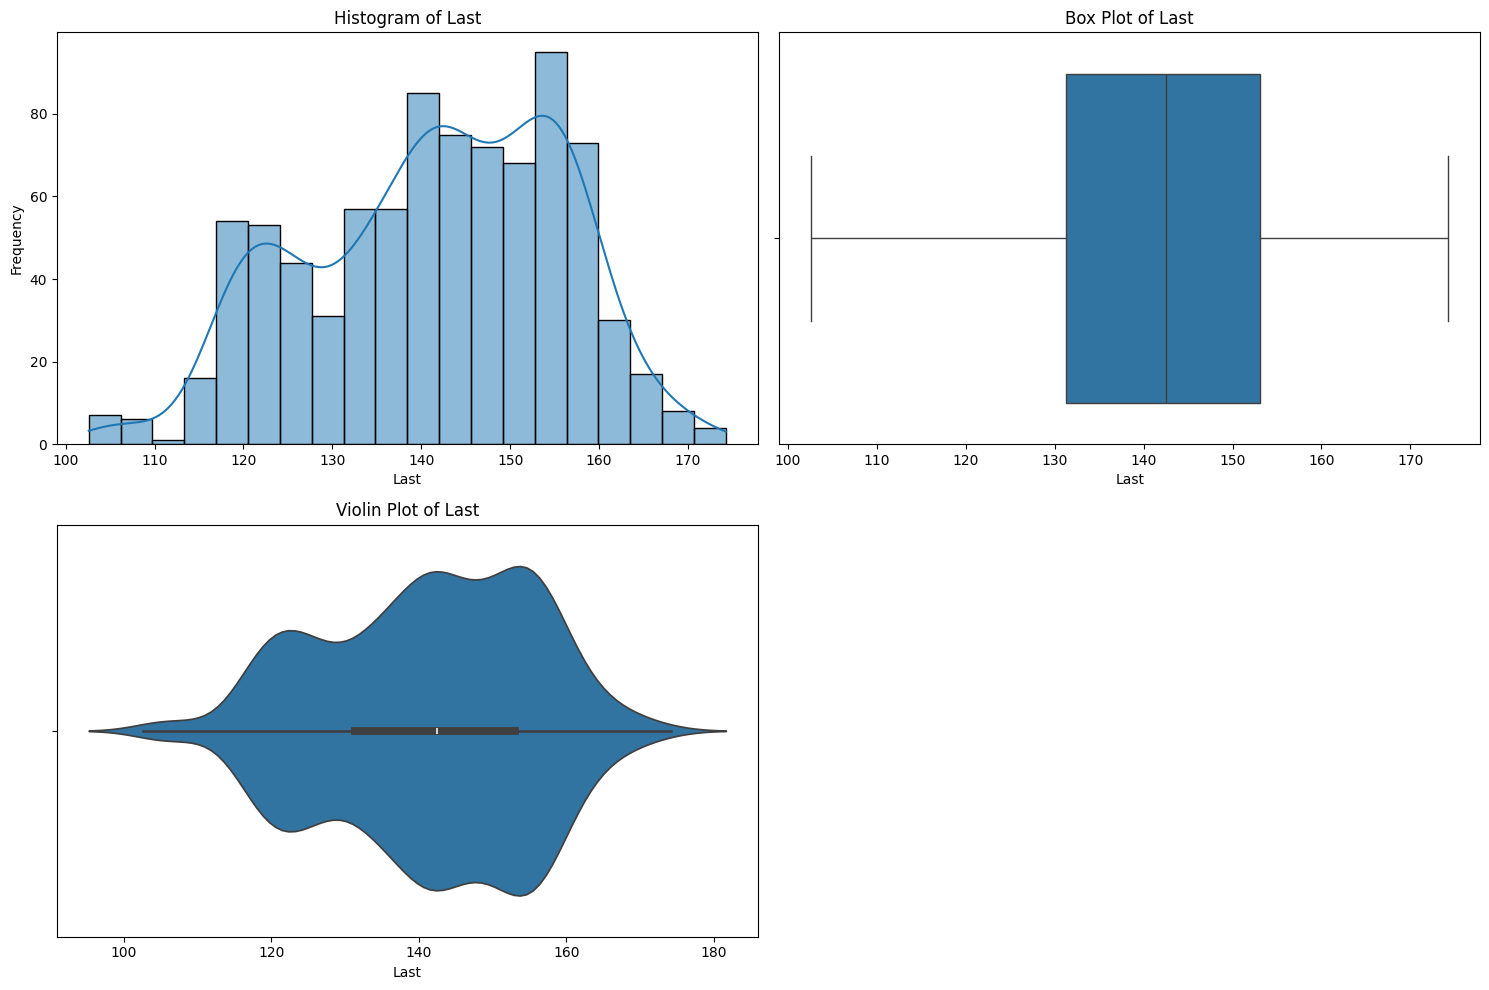


Univariate Analysis for 'Close':
count    853.000000
mean     141.493318
std       14.244963
min      102.650000
25%      131.200000
50%      142.550000
75%      153.100000
max      174.200000
Name: Close, dtype: float64


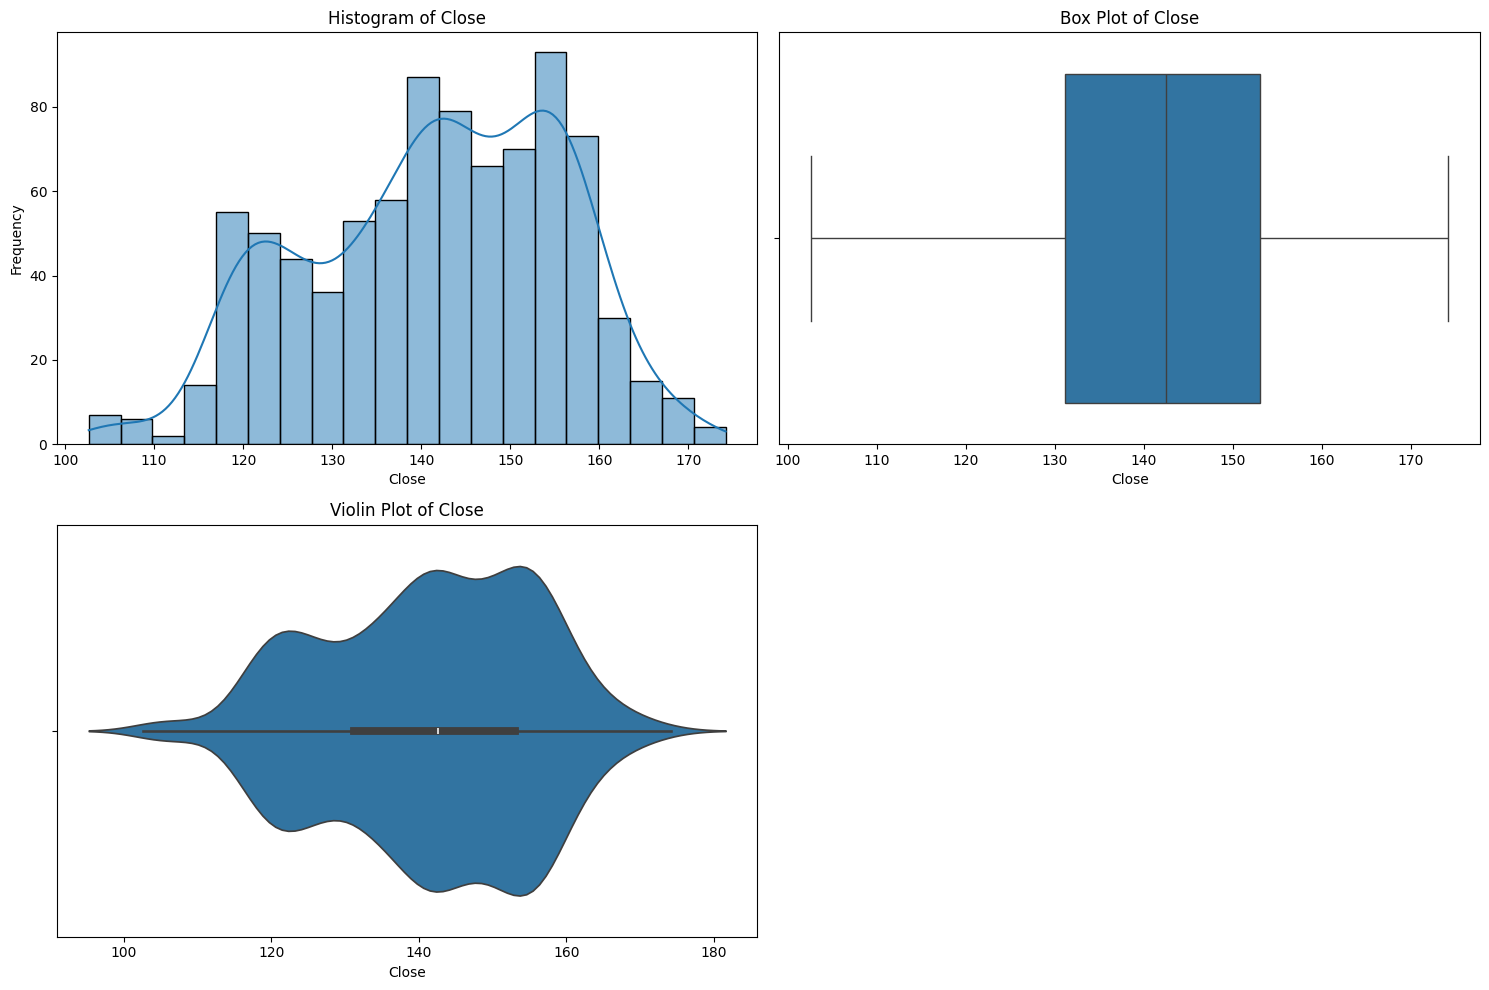


Univariate Analysis for 'Total Trade Quantity':
count    8.530000e+02
mean     1.705058e+06
std      7.947172e+05
min      1.001800e+05
25%      1.122120e+06
50%      1.541039e+06
75%      2.170944e+06
max      4.332991e+06
Name: Total Trade Quantity, dtype: float64


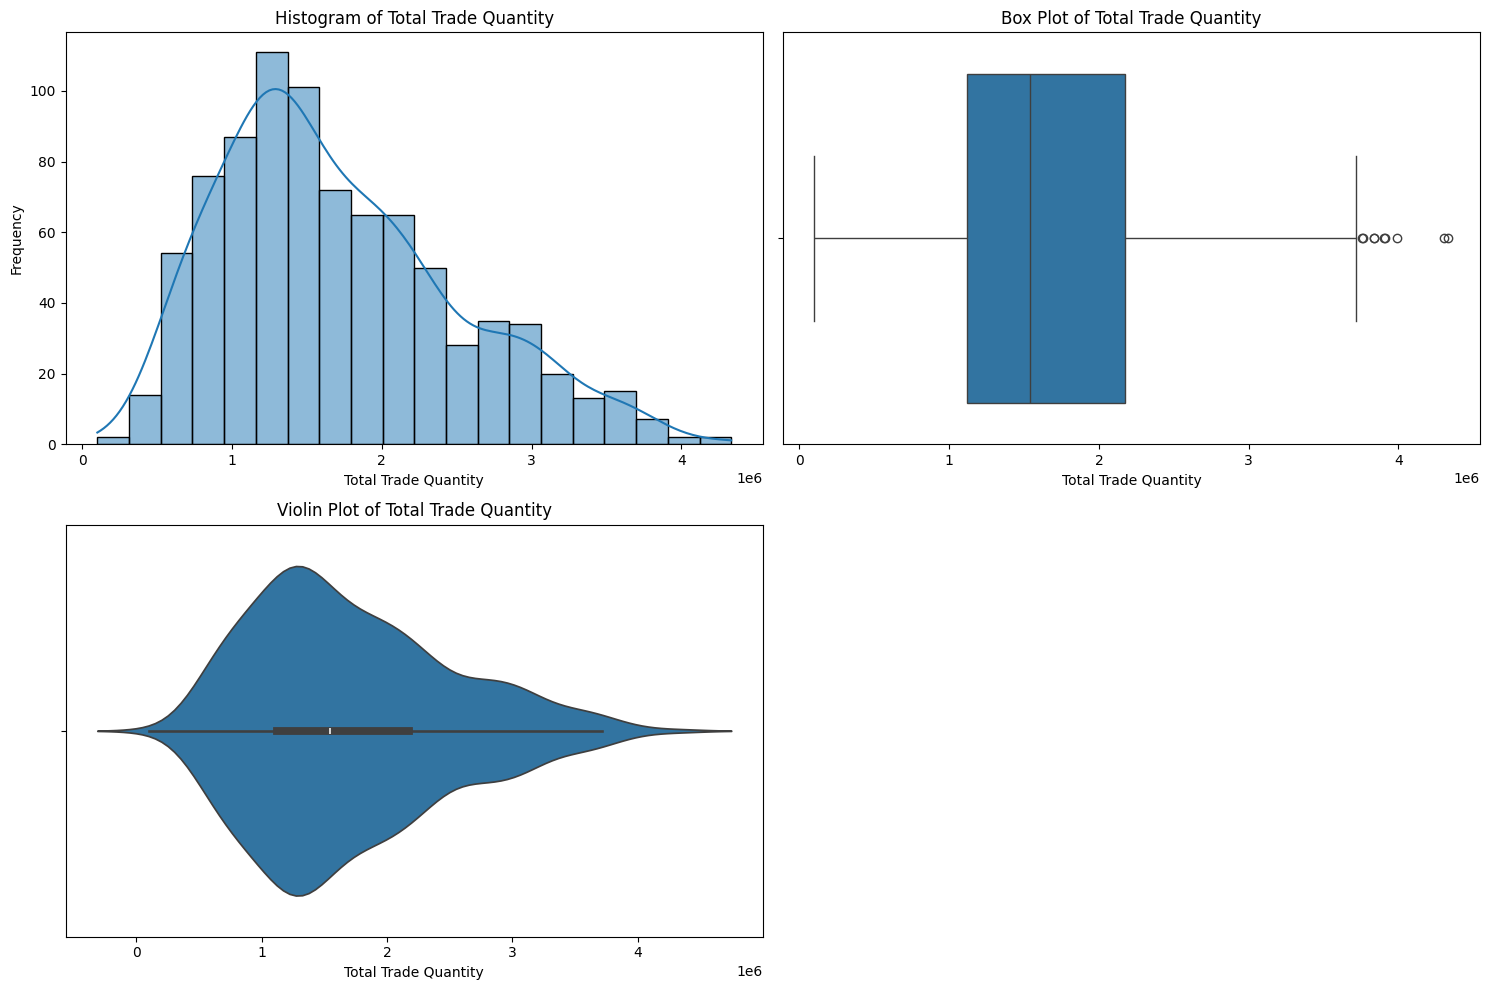


Univariate Analysis for 'Turnover (Lacs)':
count     853.000000
mean     2457.912052
std      1240.685348
min       128.040000
25%      1539.680000
50%      2183.570000
75%      3204.490000
max      5966.470000
Name: Turnover (Lacs), dtype: float64


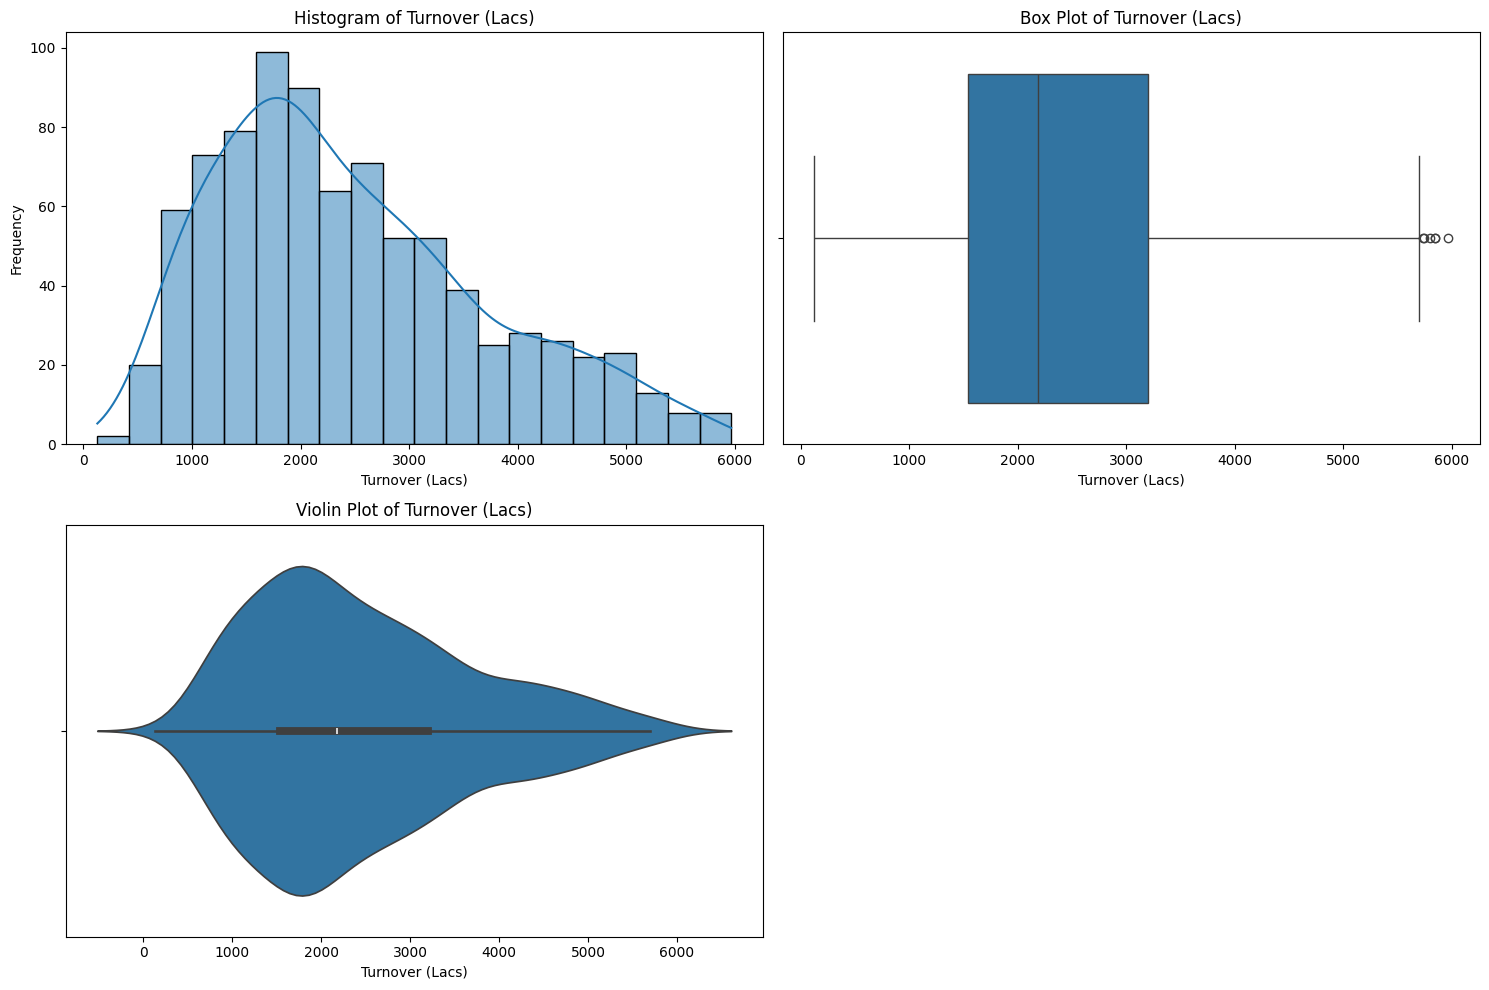

In [72]:
univariate_analysis(df1)

### Summary of Normal Distribution Findings

The visualizations from our univariate analysis indicate that the numeric features in our dataset generally follow a normal distribution.

1. **Histograms**: The histograms display a bell-shaped curve for most features, suggesting that the data is symmetrically distributed around the mean. This is characteristic of a normal distribution, where the majority of the values cluster near the center, with fewer values appearing as you move away from the mean.

2. **Box Plots**: The box plots reveal that the interquartile ranges (IQR) are fairly balanced, with no significant skewness or extreme outliers affecting the central tendency. The median line is approximately centered within the box, reinforcing the idea of symmetry typical of normally distributed data.

3. **Violin Plots**: These plots further confirm the findings from the histograms and box plots, showing a smooth, continuous density that peaks at the center of the distribution. The presence of similar shapes across features indicates that they share a similar distribution pattern.

4. **Count Plots**: For features with limited unique values, the count plots illustrate a balanced frequency across categories, suggesting that these distributions also lean towards normality, albeit within a discrete context.

In conclusion, the combination of these visualizations collectively suggests that the numeric features are well-aligned with the characteristics of a normal distribution, which may be advantageous for further statistical analysis and modeling.


In [73]:
def bivariate_analysis(dataframe):
    """
    Perform bivariate analysis on numeric features of the dataframe.
    This includes correlation analysis and visualizations.
    
    Parameters:
        dataframe (pd.DataFrame): The input data frame for analysis.
    """
    
    # Select numeric features
    numeric_features = dataframe.select_dtypes(include=['number']).columns
    
    # Correlation matrix
    plt.figure(figsize=(10, 6))
    correlation_matrix = dataframe[numeric_features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.show()

    # Scatter plots for pairs of features
    for i in range(len(numeric_features)):
        for j in range(i + 1, len(numeric_features)):
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=dataframe[numeric_features[i]], y=dataframe[numeric_features[j]])
            plt.title(f'Scatter Plot: {numeric_features[i]} vs {numeric_features[j]}')
            plt.xlabel(numeric_features[i])
            plt.ylabel(numeric_features[j])
            plt.show()

    # Pair plots for comprehensive view
    sns.pairplot(dataframe[numeric_features])
    plt.title('Pair Plot of Numeric Features')
    plt.show()

# Bivariate Analysis

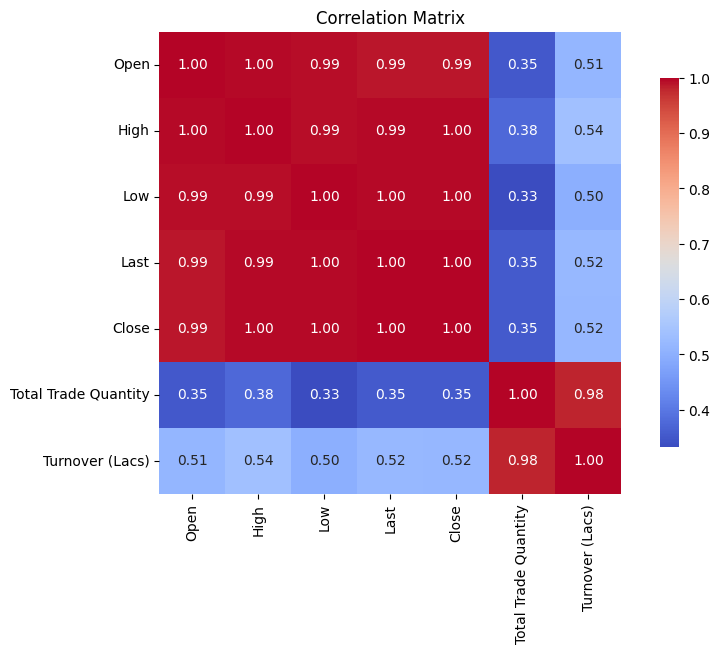

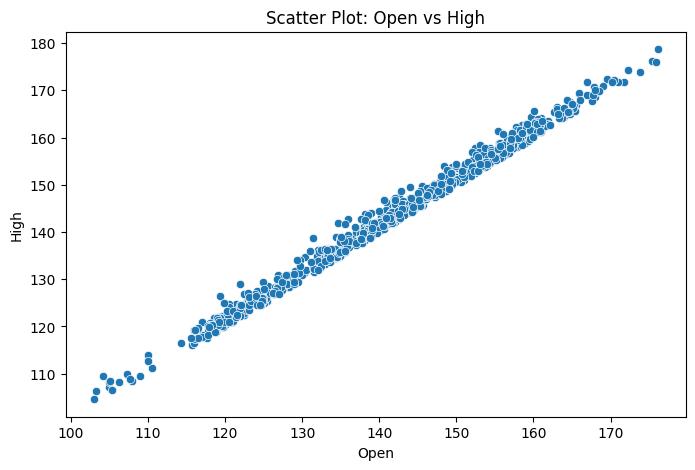

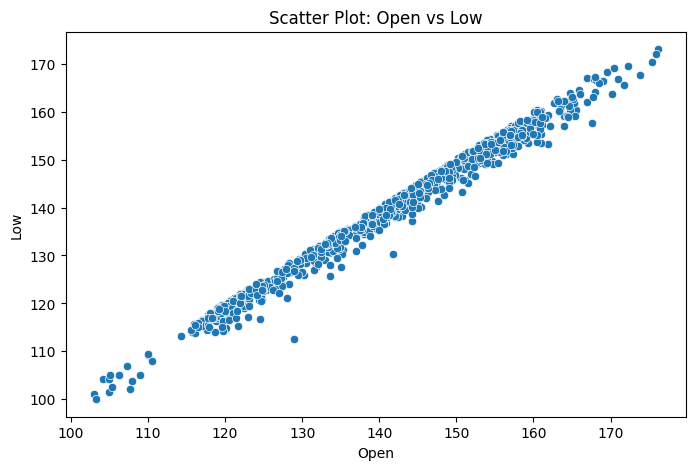

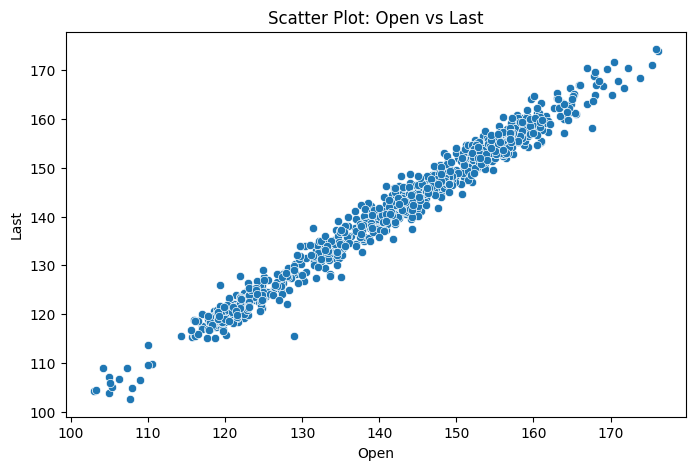

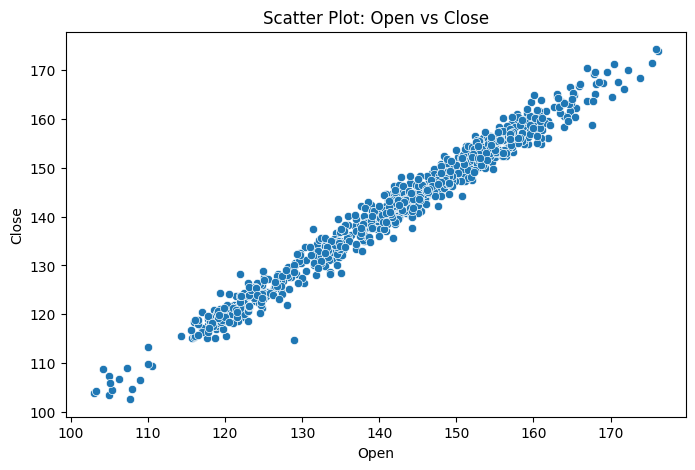

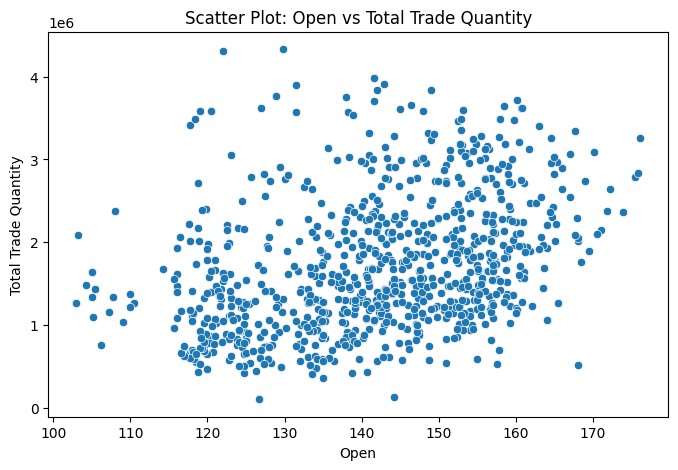

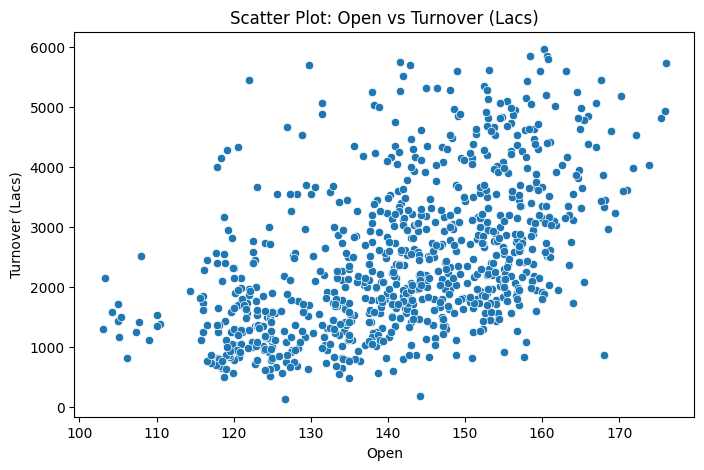

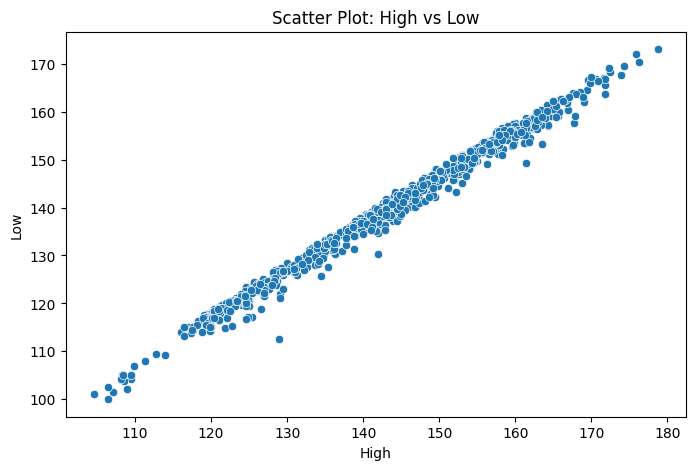

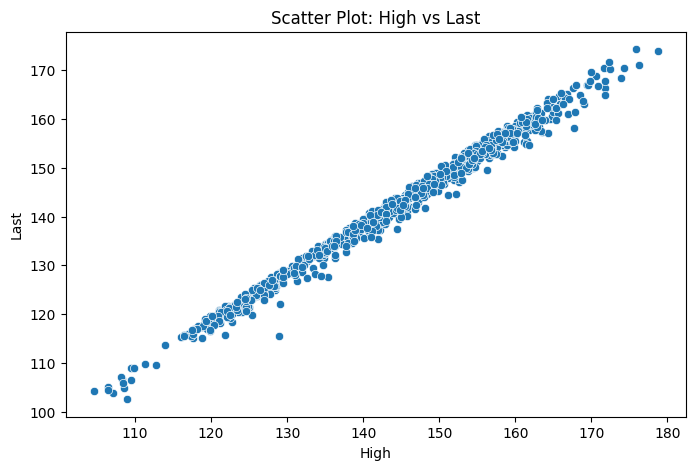

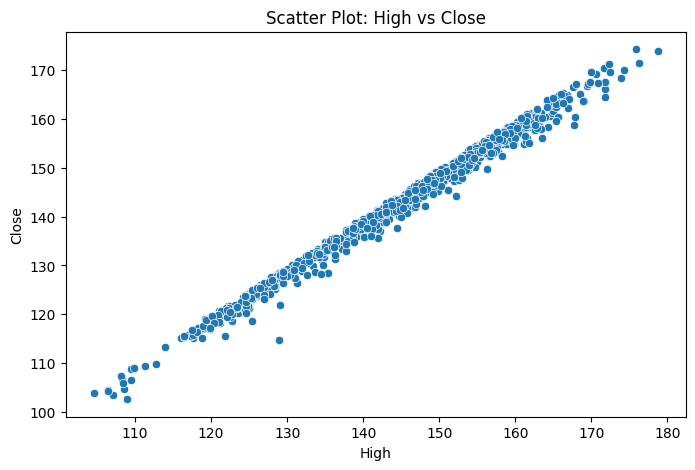

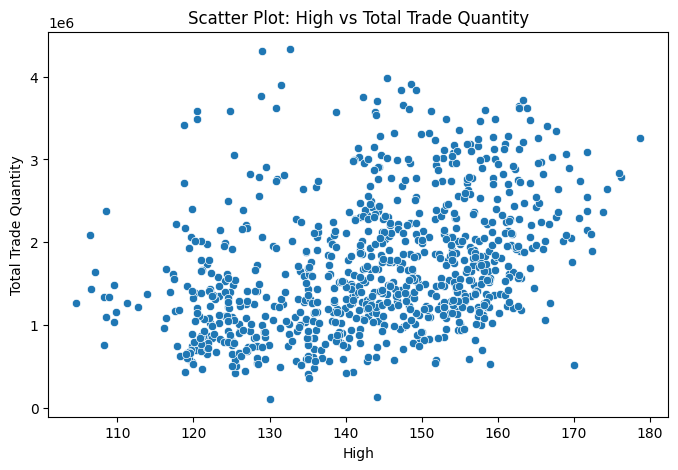

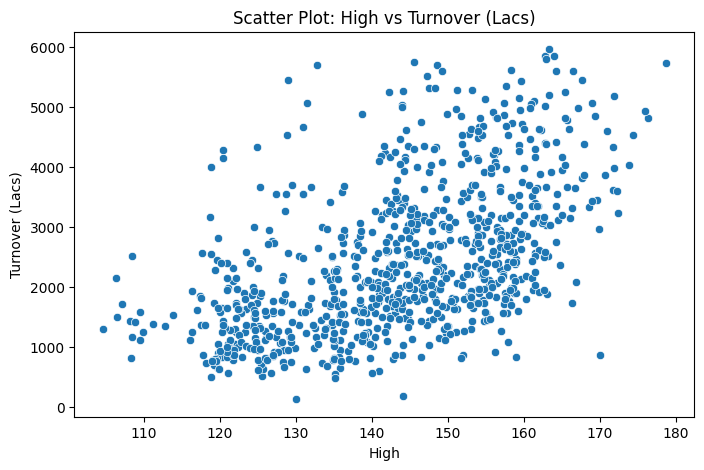

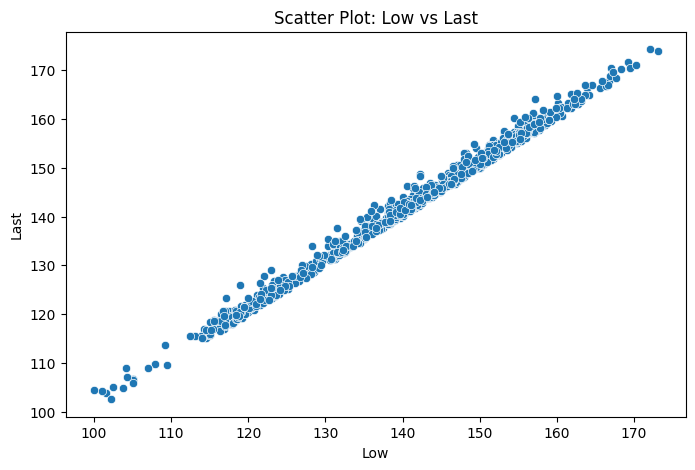

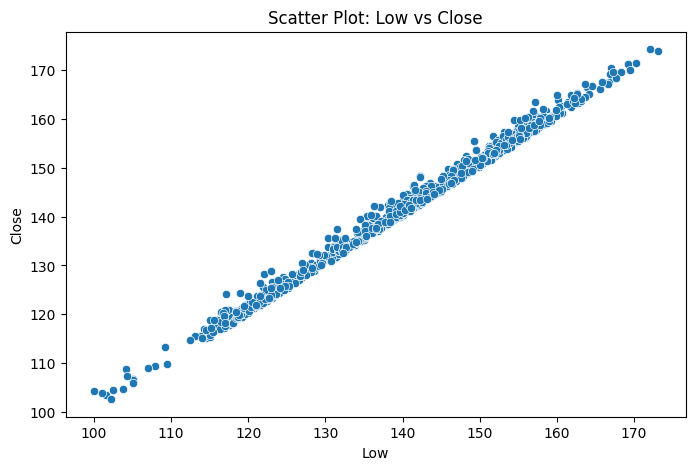

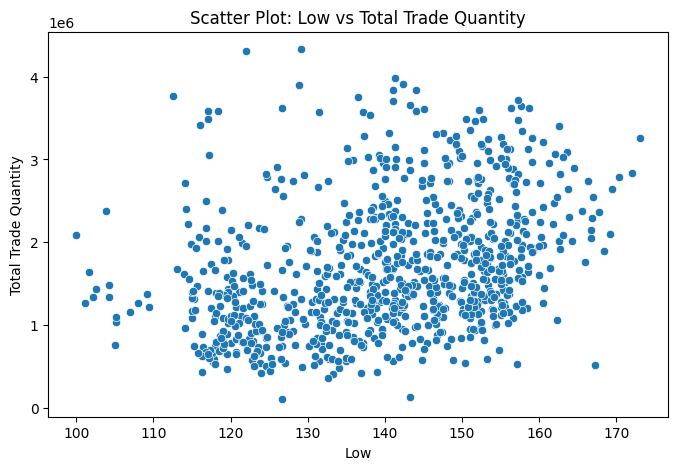

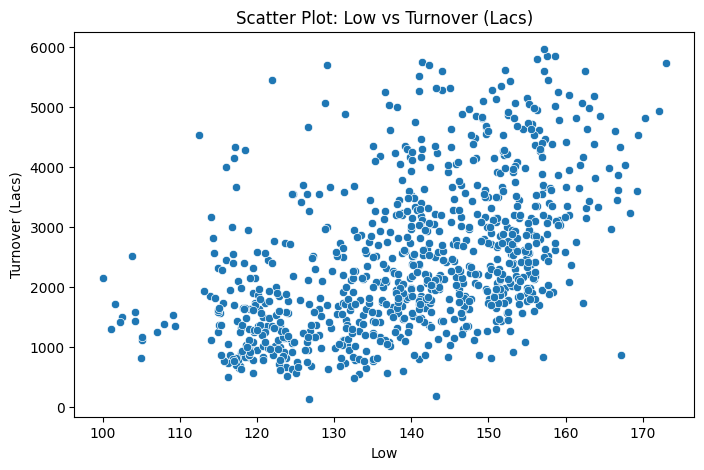

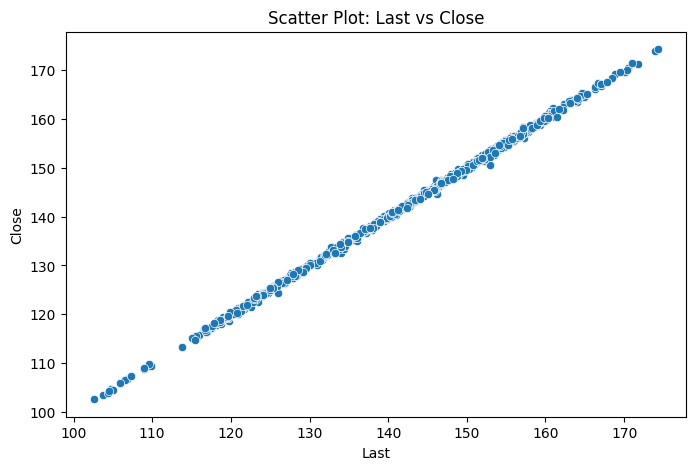

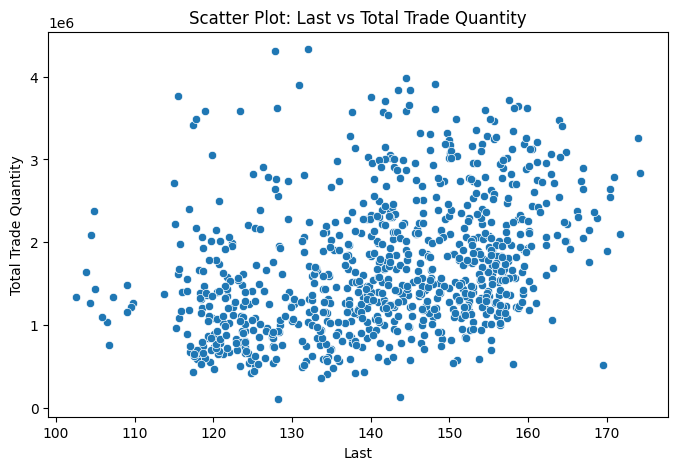

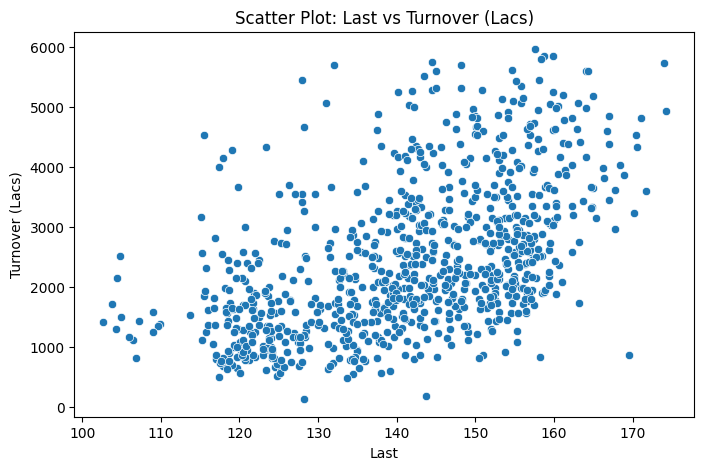

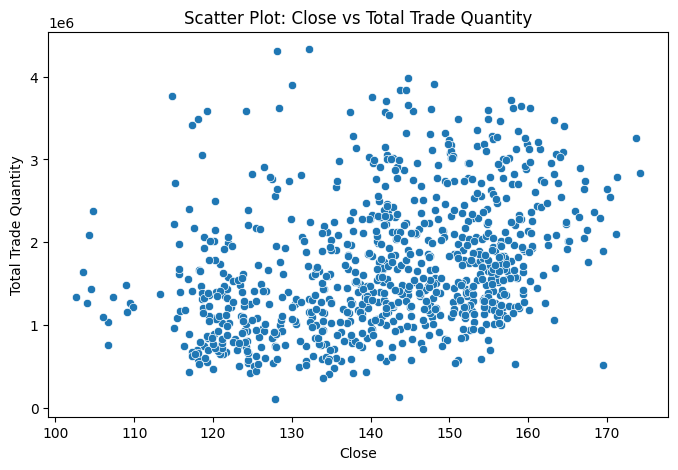

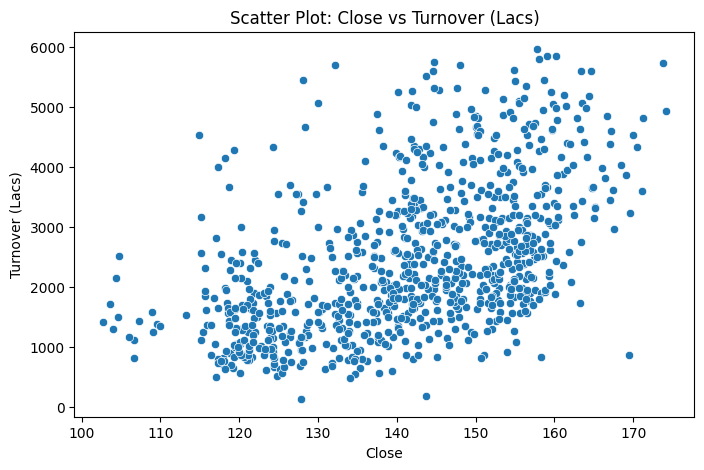

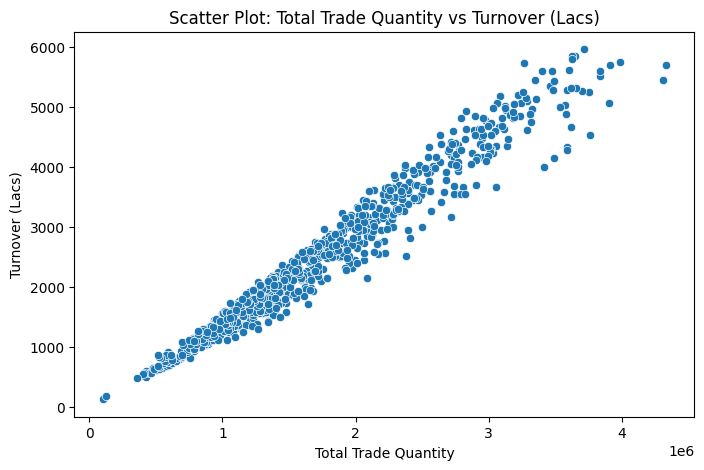

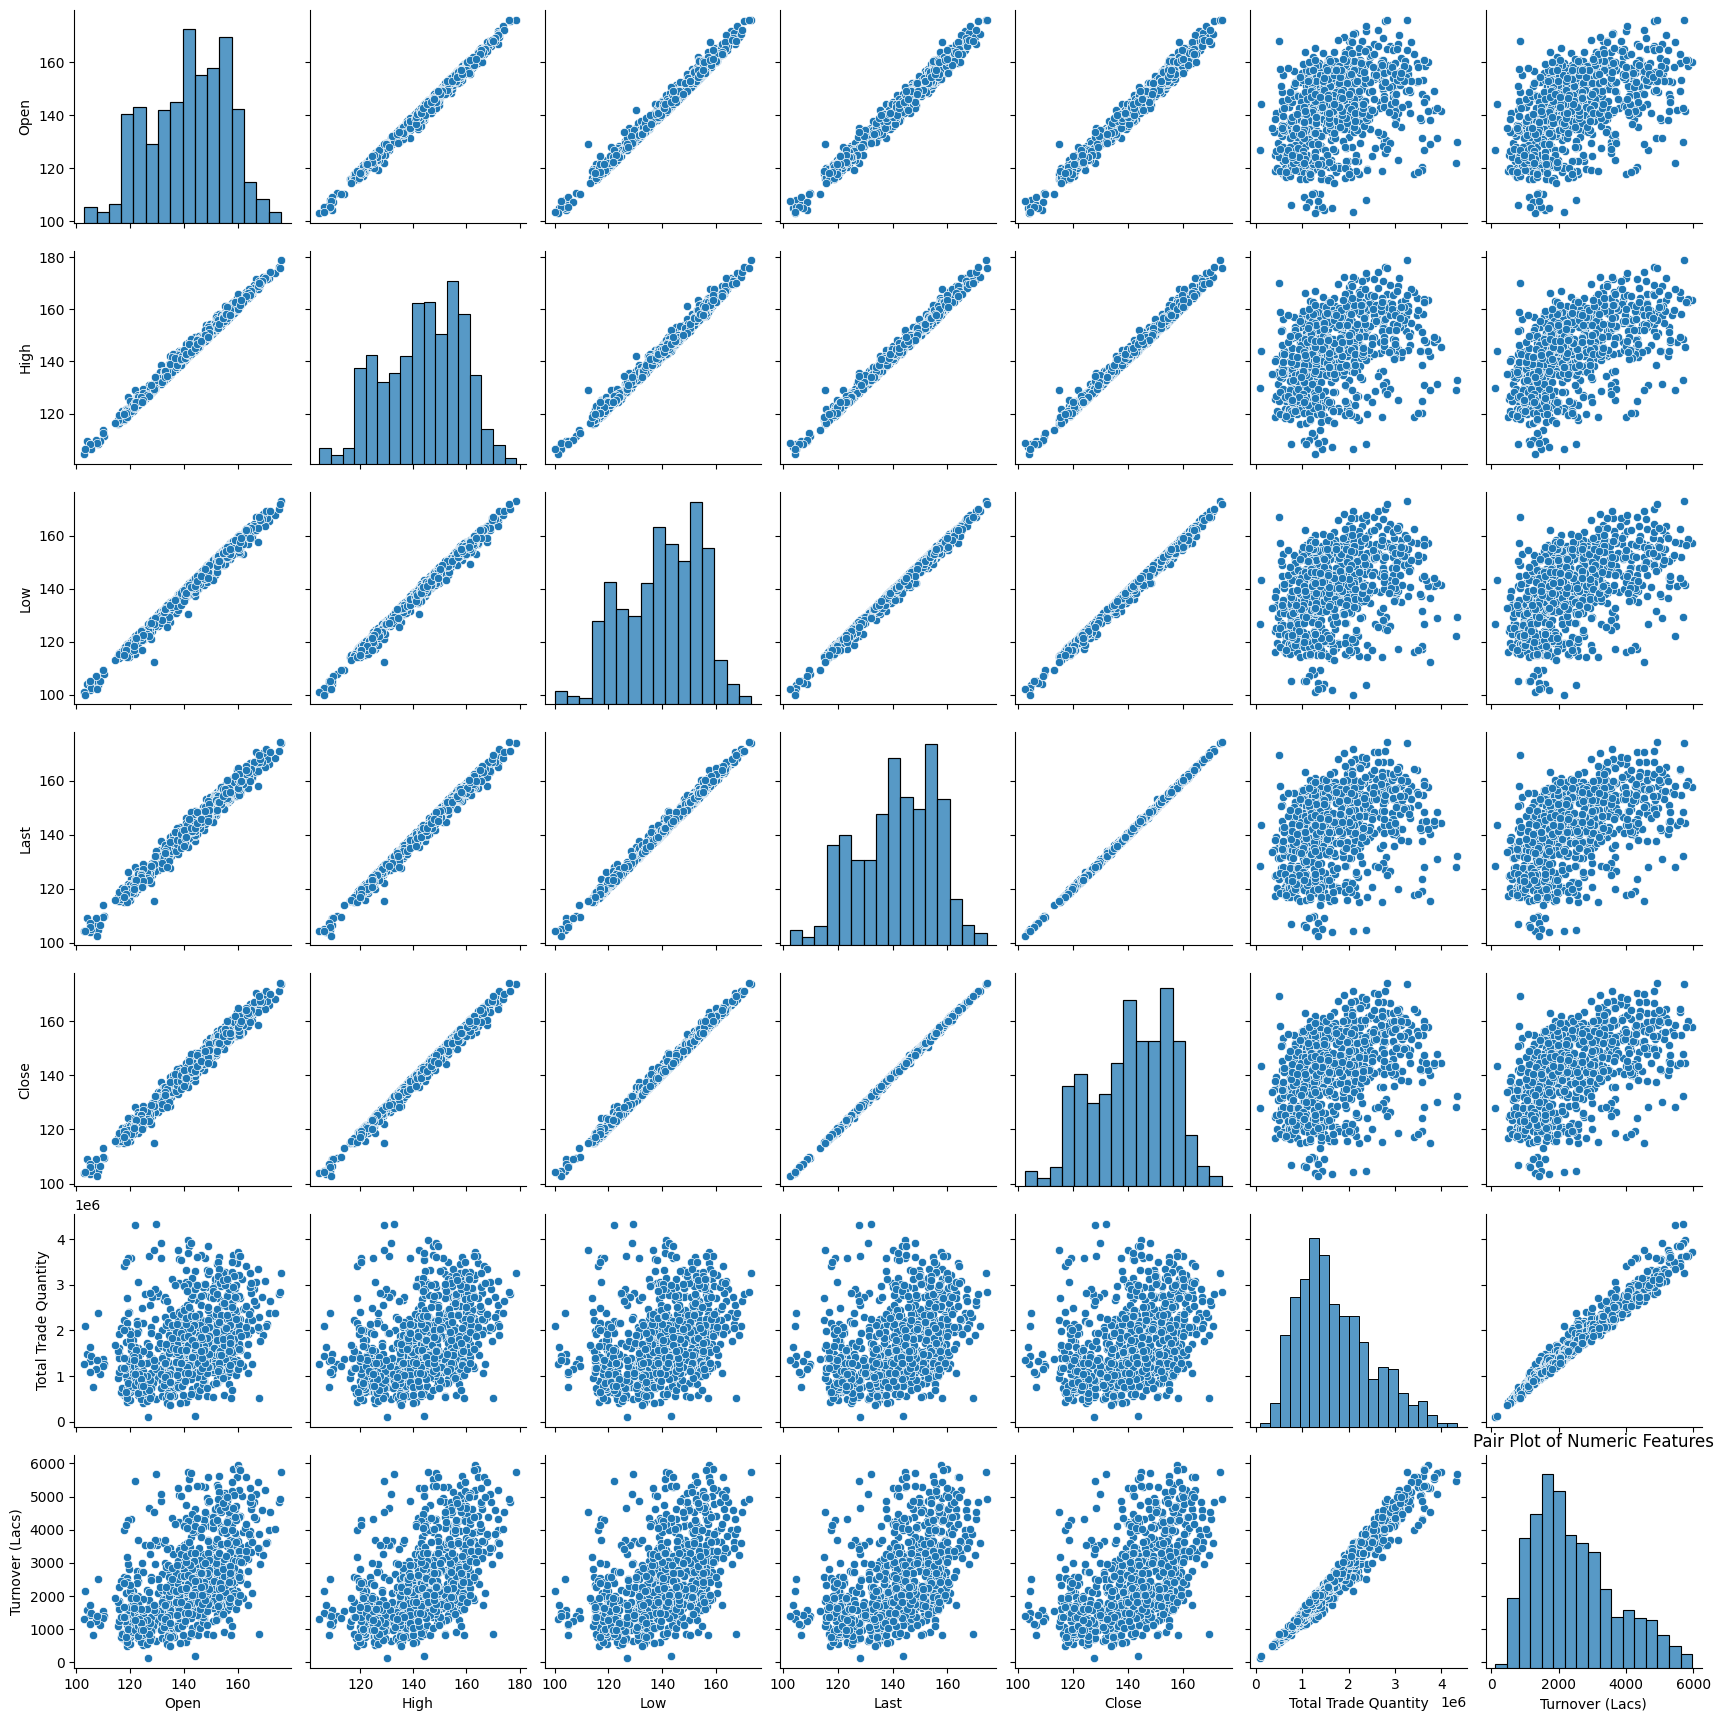

In [74]:
bivariate_analysis(df1)

### Implications of Highly Correlated Features

During our bivariate analysis, we identified that several features in the dataset are highly correlated with one another. This correlation indicates a strong linear relationship between these features, meaning that they often move together. While this can provide valuable insights, it also raises several important considerations:

1. **Redundancy**: High correlations between features may lead to redundancy in the dataset. When multiple features convey similar information, they can clutter the model without contributing additional value, potentially complicating the analysis.

2. **Multicollinearity**: In statistical modeling, especially in regression, high correlation among independent variables can introduce multicollinearity. This phenomenon can inflate the variance of the coefficient estimates, making them unstable and difficult to interpret. As a result, it may hinder the model's ability to generalize to new data.

3. **Model Performance**: Algorithms that rely on distance metrics or gradient descent may be adversely affected by highly correlated features. These algorithms can become biased towards certain features, skewing the results and potentially leading to poorer predictive performance.

To mitigate these issues, we will standardize the features to ensure they are on a uniform scale. This will help reduce redundancy and facilitate better model performance.


In [75]:
scaler = StandardScaler()

In [76]:
df2 = scaler.fit_transform(df1)
arr = pd.DataFrame(df2)

In [77]:
X = arr.drop(columns= 4)
y = arr[4]

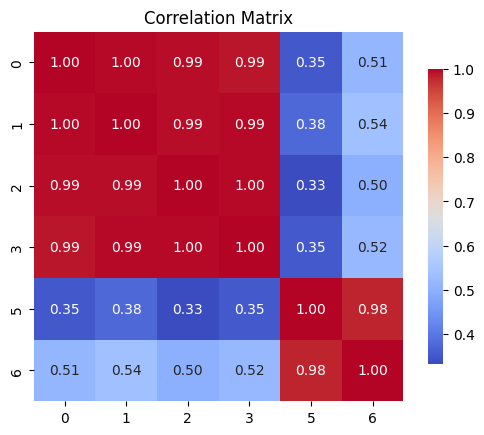

In [78]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


### Observations After Standardization

After applying standardization to the dataset, we observed that several features continue to exhibit high correlations with one another. This persistent correlation suggests that the relationships among these features are inherent in the data itself and not merely a consequence of differing scales.

#### Key Considerations:

1. **Intrinsic Relationships**: The continued high correlation indicates that these features may be measuring similar underlying constructs or phenomena. This can provide valuable insights, but it also highlights potential redundancy.

2. **Impact on Modeling**: The presence of high correlation can still lead to issues such as multicollinearity in regression models, which can affect the stability and interpretability of coefficient estimates. 

3. **Dimensionality Reduction**: To address the implications of high correlation, we may consider employing dimensionality reduction techniques, such as Principal Component Analysis (PCA). PCA can help to condense correlated features into fewer, uncorrelated components, simplifying the model while retaining essential information.

4. **Feature Selection**: Another approach could be to perform feature selection to retain only the most informative features, thereby reducing redundancy and improving model performance.

In conclusion, while standardization has aligned the scales of the features, the high correlations reveal deeper relationships within the data that may require further examination and thoughtful handling in our analysis.


Explained variance by each principal component:
PC 1: 0.7625
PC 2: 0.2339
PC 3: 0.0020
PC 4: 0.0007
PC 5: 0.0006
PC 6: 0.0002


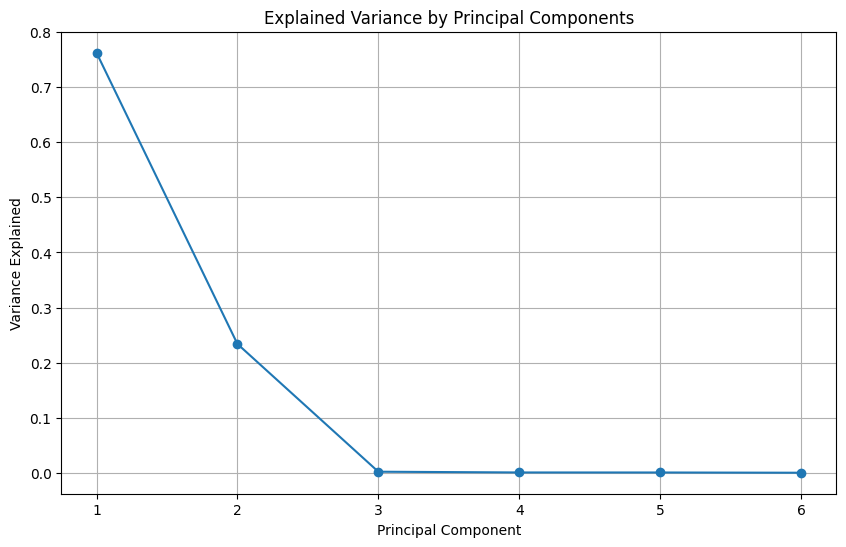

PCA Result:
        PC1       PC2
0  2.821768  0.348658
1  2.483881 -1.837091
2  4.053347 -0.295222
3  4.234085  0.010283
4  3.576092 -0.253755


In [79]:
from sklearn.decomposition import PCA


# Assuming X is your standardized DataFrame
# Apply PCA
pca = PCA()
pca.fit(X)

# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Print explained variance
print("Explained variance by each principal component:")
for i, variance in enumerate(explained_variance):
    print(f"PC {i + 1}: {variance:.4f}")

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Choose number of components to keep based on explained variance (e.g., 95%)
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% variance

# Apply PCA with the chosen number of components
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(X)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])

# Show the PCA DataFrame
print("PCA Result:")
print(pca_df.head())


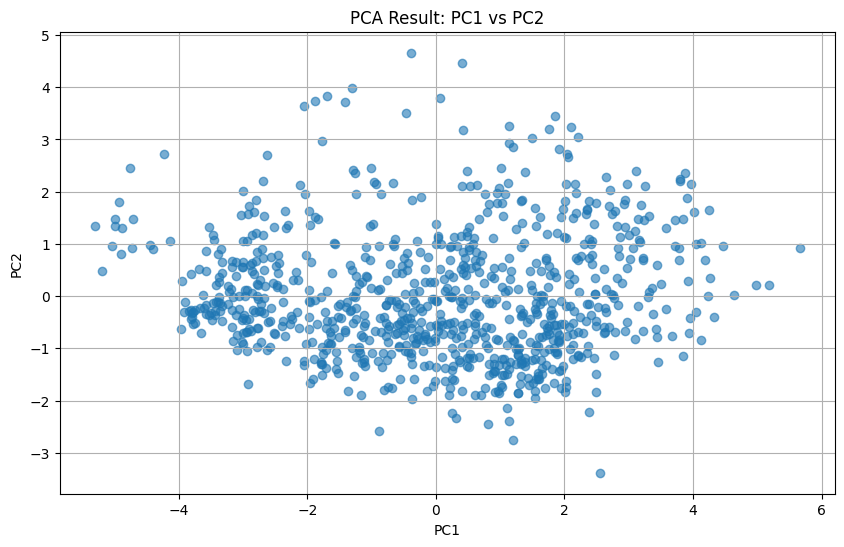

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title('PCA Result: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [81]:
pca_df

,PC1,PC2
0,2.821768,0.348658
1,2.483881,-1.837091
2,4.053347,-0.295222
3,4.234085,0.010283
4,3.576092,-0.253755
...,...,...
848,2.019737,-1.635109
849,2.619852,-0.705504
850,3.241257,1.452408
851,2.093561,-0.180380


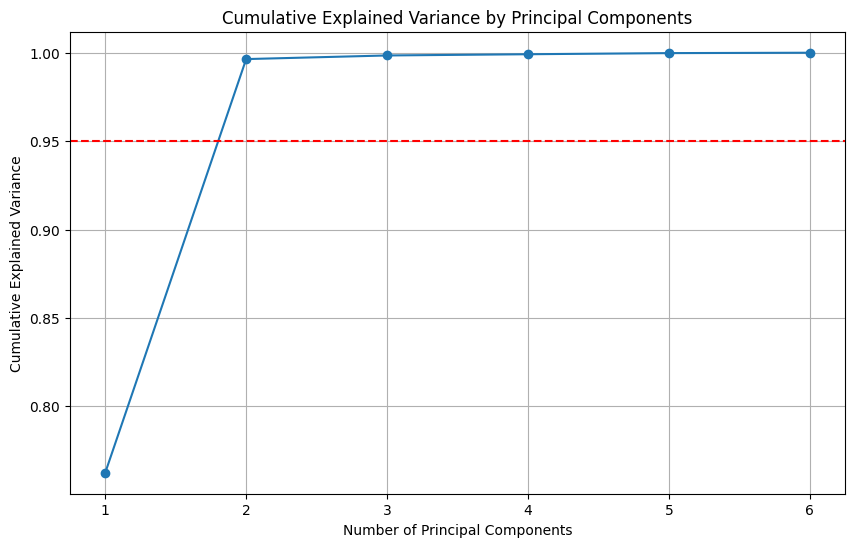

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% line
plt.grid()
plt.show()

In [83]:
pca_df

,PC1,PC2
0,2.821768,0.348658
1,2.483881,-1.837091
2,4.053347,-0.295222
3,4.234085,0.010283
4,3.576092,-0.253755
...,...,...
848,2.019737,-1.635109
849,2.619852,-0.705504
850,3.241257,1.452408
851,2.093561,-0.180380


In [84]:
y

0      1.018970
1      1.447443
2      1.721385
3      2.033959
4      1.752993
         ...   
848    1.261303
849    1.303448
850    1.310472
851    0.987362
852    1.004922
Name: 4, Length: 853, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor()
}


In [87]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

Linear Regression - Mean Squared Error: 0.0039, R^2 Score: 0.9962
Random Forest - Mean Squared Error: 0.0060, R^2 Score: 0.9941
Support Vector Regressor - Mean Squared Error: 0.0046, R^2 Score: 0.9955
Decision Tree - Mean Squared Error: 0.0198, R^2 Score: 0.9806


## Going with Linear regression as it is performing good in our case

#### Doing Regularization to get robust model

## Lasso regularization

In [88]:
lassocv = LassoCV(alphas = None,cv = 5, max_iter=2000000)
lassocv

LassoCV(cv=5, max_iter=2000000)

In [89]:
lassocv.fit(X_train,y_train)

LassoCV(cv=5, max_iter=2000000)

In [90]:
lassocv.alpha_

0.002049098929029566

In [91]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.002049098929029566)

In [92]:
y_pred = model.predict(X_test)

In [93]:
lasso.score(X_test,y_test)

0.9961628420878886

## Ridge Regularization

In [94]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10)

In [95]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([6.80345308, 7.7312927 , 4.79518442, 1.2633958 , 7.70571987,
       6.86062072, 4.65607587, 0.77150158, 8.54293766, 3.50815506,
       2.85949711, 7.58688405, 4.40768052, 2.29407423, 4.66943781,
       2.15432895, 0.1223458 , 4.4572993 , 7.94006787, 0.90279362,
       5.94456299, 9.12637588, 6.92272468, 9.78895024, 4.21799447,
       9.98910756, 9.42525524, 9.50368692, 7.6638774 , 4.70996   ,
       0.61960031, 7.61343887, 8.55017912, 0.63722287, 2.41786387,
       2.5411769 , 9.29044136, 6.04271834, 4.81978606, 7.51088062,
       4.41796143, 0.2577175 , 9.9441226 , 0.78919342, 3.23630563,
       6.59074946, 8.01319246, 2.49173302, 0.80807251, 3.9330864 ]),
        cv=10)

In [96]:
ridgecv.alpha_

2.1543289479844576

In [97]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=2.1543289479844576)

In [98]:
ridge.score(X_test,y_test)

0.9961673782707395

## Elastic net regularization

In [99]:
elastic_cv = ElasticNetCV(alphas=None,cv = 5)
elastic_cv.fit(X_train,y_train)


ElasticNetCV(cv=5)

In [100]:
elastic_cv.alpha_
# over here alpha is nothing ut lambda that we have learnt in theory 

0.004098197858059132

In [101]:
elastic_cv.l1_ratio_
# it is nothing but your second parameter that we need to find in elastics as there werre both used in this which was l1 and alpha
#as elastic is combination of both lasso and ridge

0.5

In [102]:
elastic = ElasticNet(alpha = elastic_cv.alpha_, l1_ratio= elastic_cv.l1_ratio_ )

In [103]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.004098197858059132)

In [104]:
elastic.score(X_test,y_test)

0.9961576448409469

## Conclusion

In conclusion, linear regression has proven to be an effective model for your analysis, demonstrating superior accuracy compared to other regression techniques. By incorporating regularization, I’ve enhanced the model’s ability to generalize and avoid overfitting, which is critical in ensuring reliable predictions.

The slight differences in accuracy, with one model achieving **0.99616** and another **0.99615**, highlight the sensitivity of performance metrics in regression tasks. Ultimately, the marginal gains suggest that both models are highly effective, and the choice may depend on other factors such as interpretability, computational efficiency, or specific business requirements.

Overall, linear regression, particularly with regularization, offers a robust solution for your dataset, balancing simplicity and performance. As you move forward, consider validating these results with additional metrics and cross-validation to ensure the model’s reliability across various scenarios.
